#### 1.Load data from csv with pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('datasets//salary_food.csv')
df

,income,food_expenses
0,16,52
1,20,60
2,12,50
3,14,52
4,14,50
5,15,48
6,12,48
7,10,46
8,10,48
9,12,50


#### 2.ตรวจสอบการกระจายของข้อมูลด้วยการพล็อตกราฟ scatter plot

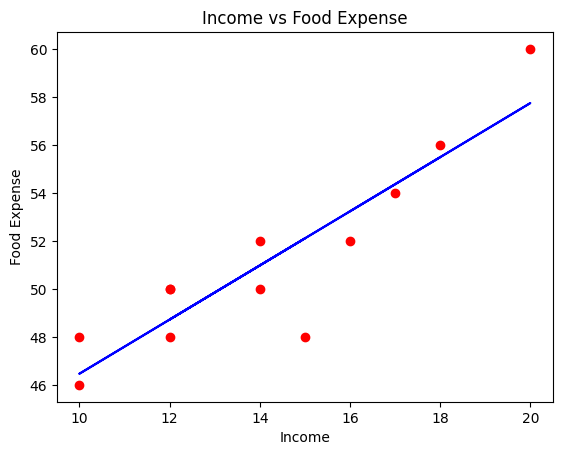

In [3]:
plt.scatter(df['income'], df['food_expenses'],color='red')
plt.title('Income vs Food Expense')
plt.xlabel('Income')
plt.ylabel('Food Expense')

# หาความชัน (slope) 
m,b = np.polyfit(df['income'], df['food_expenses'], 1)

# สร้างเส้นตรง
plt.plot(df['income'], m*df['income']+b , color='blue')

plt.show()

#### 3.แบ่งข้อมูลเป็นชุดข้อมูลสำหรับการฝึกและทดสอบโมเดล

In [4]:
x = df[['income']] #ตัวแปรอิสระต้องเป็น 2 มิติ
y = df['food_expenses'] #ตัวแปรตาม ต้องเป็น 1 มิติ

# แบ่งข้อมูลเป็น 2 ส่วน train กับ test
from sklearn.model_selection import train_test_split
x_train = x[:10].values
y_train = y[:10].values

x_test = x[-2:].values
y_test = y[-2:].values

print(x_train)
print(y_train)
print(x_test)
print(y_test)



[[16]
 [20]
 [12]
 [14]
 [14]
 [15]
 [12]
 [10]
 [10]
 [12]]
[52 60 50 52 50 48 48 46 48 50]
[[17]
 [18]]
[54 56]


#### 4. training model with Linear Regression

In [5]:
# สร้าง model object linear regression
model = LinearRegression()

# train model ด้วยข้อมูล fit model
model.fit(x_train, y_train) 

LinearRegression()

#### 5.predict ข้อมูลทดสอบ

In [6]:
# ตัวอย่างการใช้ model ทำนาย
y_pred = model.predict(x_test)
print(y_pred)

[54.3030303  55.41818182]


#### 6. Model Evaluation

In [7]:
# ดูค่า coefficient of Interception
print('intercept:', model.intercept_)
# ดูค่า coefficient of slope
print('slope:', model.coef_)

# ค่า R-squared คือ ค่าที่บอกถึงความสามารถในการอธิบายข้อมูล แม่นยำแค่ไหน
r_sq = model.score(x_test, y_test)*100
print("ความแม่นยำของโมเดล: %.2f%%" % r_sq)

intercept: 35.345454545454544
slope: [1.11515152]
ความแม่นยำของโมเดล: 78.48%


#### 7. การบันทึกโมเดลเพื่อนำไปใช้งาน (Model Export)

In [8]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip show joblib

Name: joblib
Version: 1.4.2
Summary: Lightweight pipelining with Python functions
Home-page: 
Author: 
Author-email: Gael Varoquaux <gael.varoquaux@normalesup.org>
License: BSD 3-Clause
Location: d:\ML\Day2\env\Lib\site-packages
Requires: 
Required-by: scikit-learn
Note: you may need to restart the kernel to use updated packages.


In [10]:
from joblib import dump
# บันทึกโมเดล
dump(model, 'salary_food_model.joblib')

['salary_food_model.joblib']

#### 8. การโหลดโมเดลเพื่อนำไปใช้งาน (Model Import)

In [11]:
from joblib import load
# โหลดโมเดล
myModel = load('salary_food_model.joblib')

# ทำนาย
print("Prediction:", myModel.predict([[18],[30],[60]]))


Prediction: [ 55.41818182  68.8        102.25454545]
